In [4]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/cleaned_airbnb.csv')

#EDA on the cleaned data

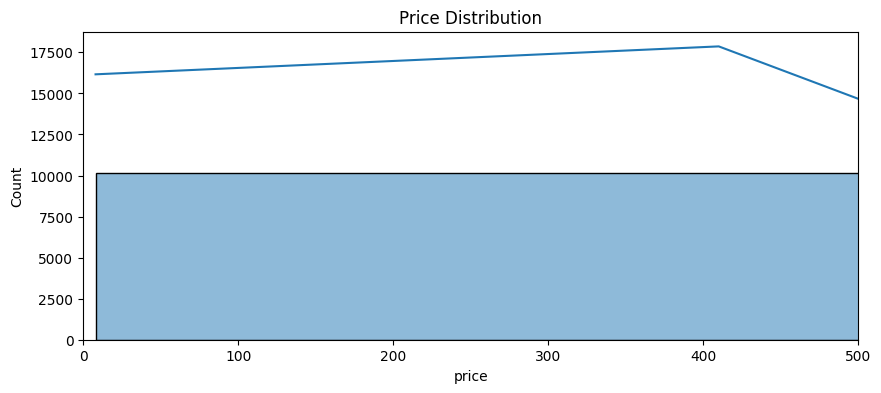

In [9]:
# Distribution of price
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlim(0, 500)
plt.show()

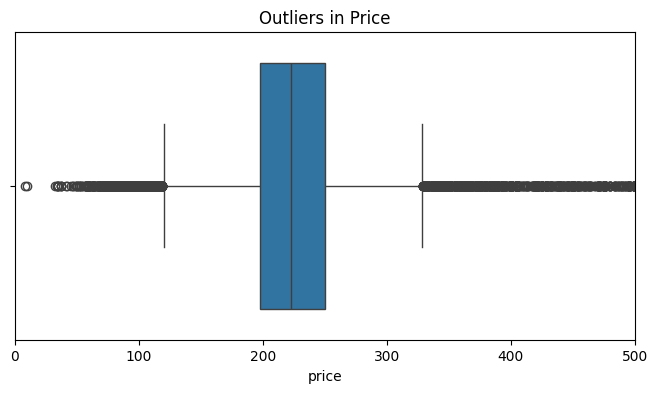

In [10]:
# Boxplot for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title("Outliers in Price")
plt.xlim(0, 500)
plt.show()

In [11]:
#count outliers
outliers = df[df['price'] > 500]
print(f"Number of outliers in price: {len(outliers)}")

Number of outliers in price: 395


Text(0.5, 1.0, 'Room Type vs Price')

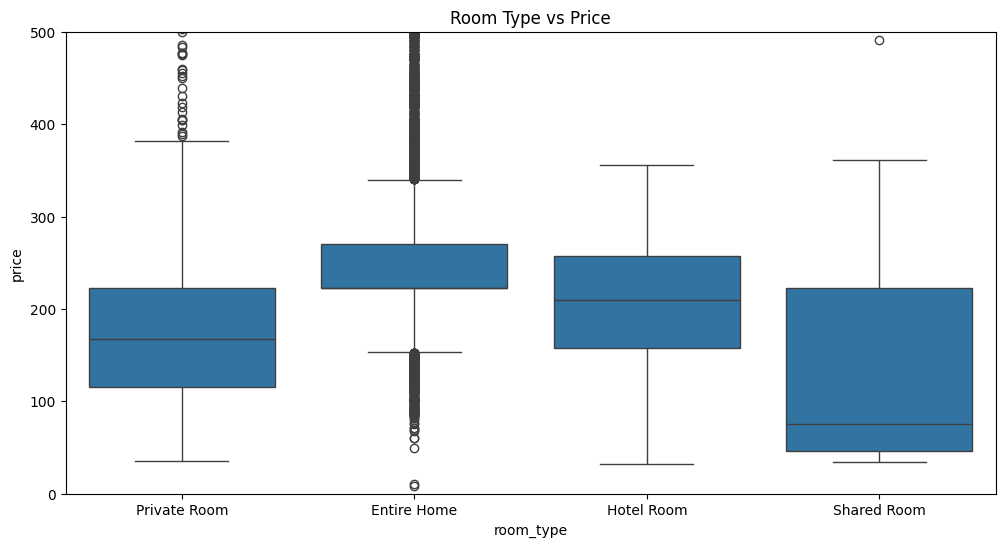

In [17]:
#compare roomtypes with prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Room Type vs Price")

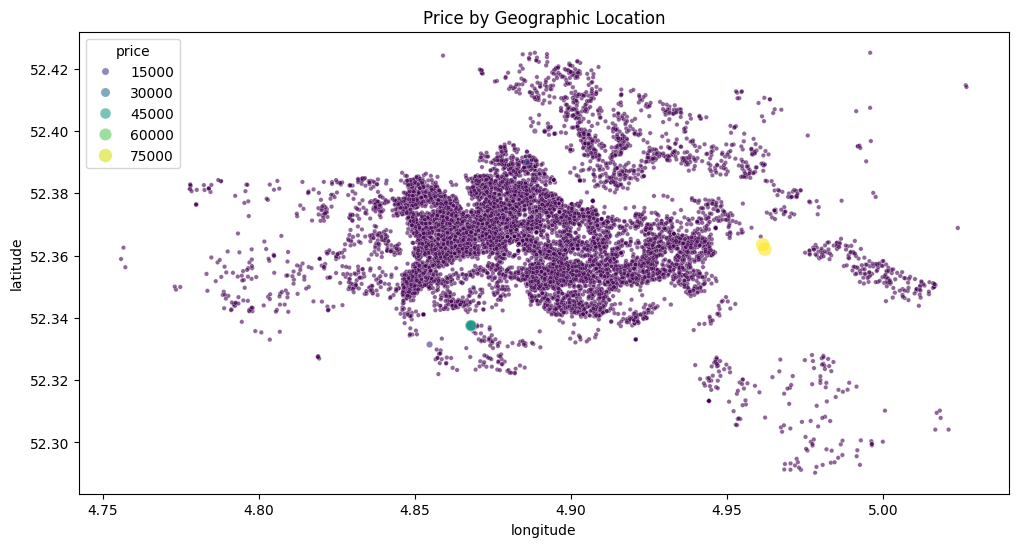

In [15]:
#Geographical spread heatmap
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='price',
                sizes=(10, 100), alpha=0.6, data=df, palette='viridis')
plt.title("Price by Geographic Location")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

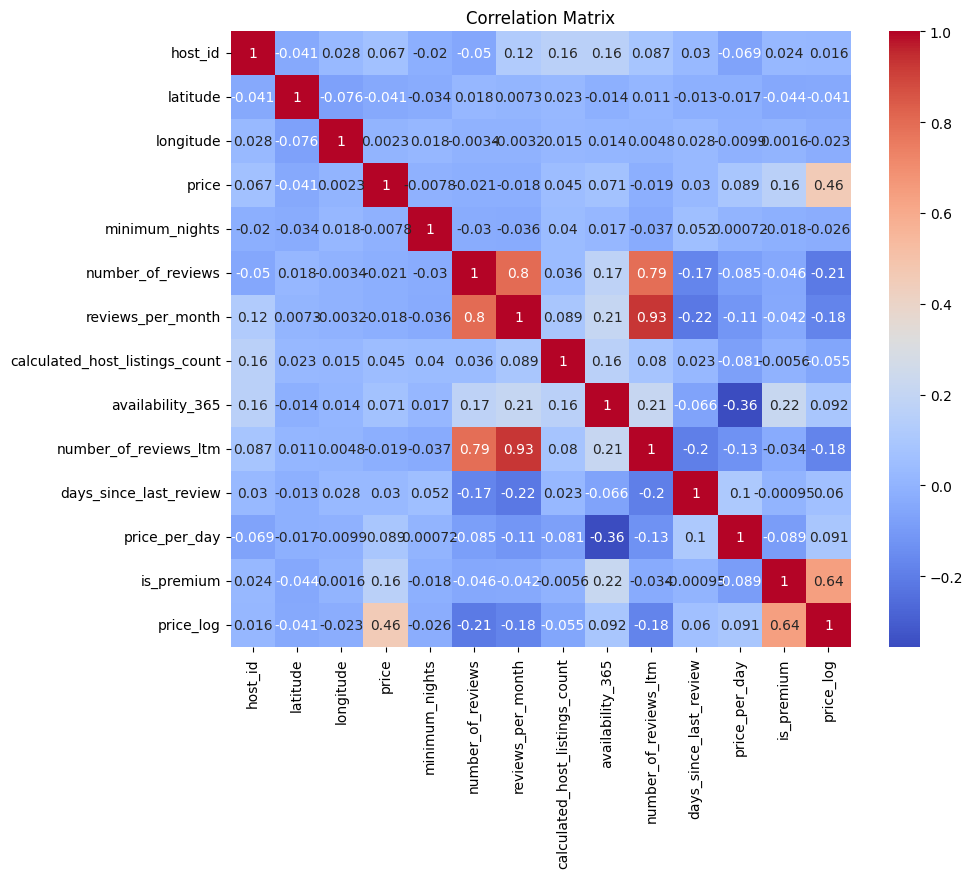

In [19]:
#price correlation with numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Review Frequency')

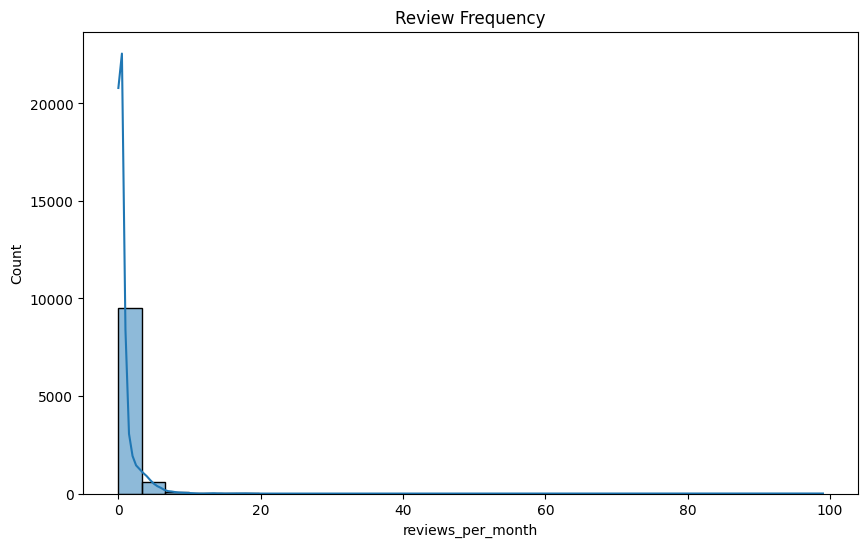

In [23]:
#Review Activity trends 
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=30, kde=True)
plt.title("Review Frequency")

Text(0.5, 1.0, 'Minimum Stay Requirement vs Price')

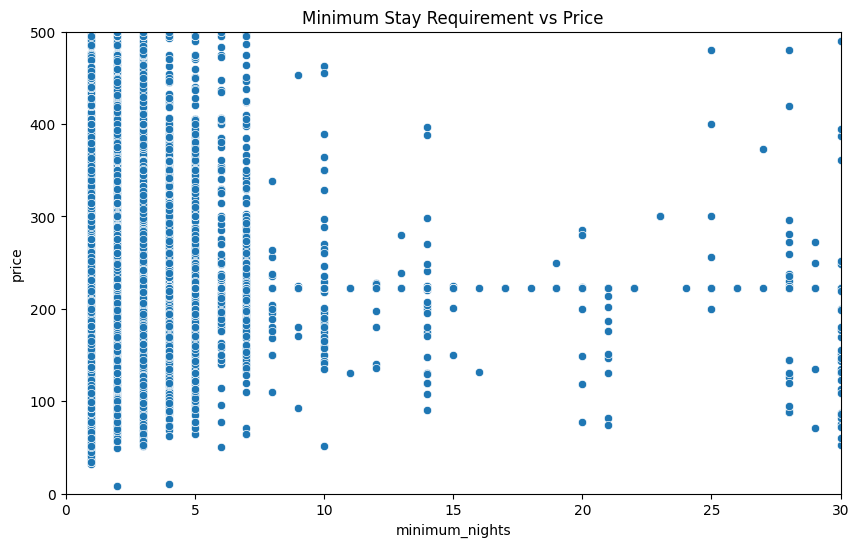

In [24]:
#minimum nights vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.xlim(0, 30)
plt.ylim(0, 500)
plt.title("Minimum Stay Requirement vs Price")


Text(0.5, 1.0, 'Availability vs Price')

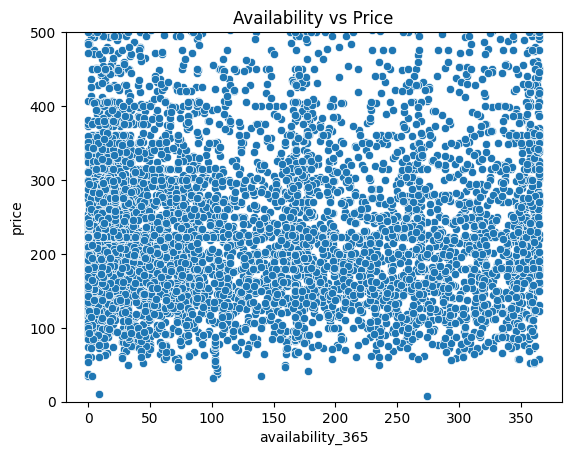

In [25]:
#Availability impacts
sns.scatterplot(x='availability_365', y='price', data=df)
plt.ylim(0, 500)
plt.title("Availability vs Price")